<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 1 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>


## Problem Description
In this assignment, we are going to get acquainted with and implement some tools for statistical analysis. These tools could come to help us in our future research and projects.

## Monte Carlo Simulation

`Monte Carlo simulation` is a computational technique used to approximate the probability of certain outcomes by running multiple random trials or sampling from a probability distribution. It's named after the famous Monte Carlo Casino in Monaco, known for games of chance that rely on randomness.

Here are a few key points about Monte Carlo simulation:

- Random Sampling: Monte Carlo simulation involves generating a large number of random samples from a known probability distribution or using random processes to model uncertainty.

- Complex Systems: It's commonly used to analyze and understand complex systems where deterministic solutions may be difficult or impossible to derive analytically. These systems often involve stochastic (random) elements.

- Numerical Integration: Monte Carlo methods can be used for numerical integration, where the goal is to estimate the value of integrals that are difficult to solve analytically by randomly sampling points in the domain of integration.

- Risk Assessment: It's extensively used in risk assessment and decision-making processes, especially in finance, engineering, and other fields where uncertainty plays a significant role. By simulating various scenarios, it helps in evaluating the likelihood of different outcomes and making informed decisions.

- Simulation Accuracy: The accuracy of Monte Carlo simulations generally improves as the number of samples or trials increases. However, even with a relatively small number of samples, Monte Carlo simulations can provide useful insights into the behavior of complex systems.

- Applications: Monte Carlo simulation has diverse applications, including but not limited to option pricing in finance, optimization problems, physics simulations (e.g., particle physics), computational biology, and reliability engineering.



### Question 1. Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?
`Monte Carlo simulation` finds applications across various fields due to its versatility in modeling and analyzing complex systems with uncertainty. Here are some real-life applications:

1. **Finance**: Monte Carlo simulation is widely used in financial modeling for risk analysis, portfolio optimization, option pricing, and Monte Carlo valuation of financial instruments.

2. **Engineering**: Engineers use Monte Carlo simulation to analyze and optimize designs, assess reliability and safety of structures, and simulate complex systems like traffic flow, power grids, and manufacturing processes.

3. **Healthcare**: Monte Carlo simulation aids in medical research, drug development, treatment planning, and healthcare resource allocation by modeling patient outcomes, disease spread, and clinical trials.

4. **Energy**: Monte Carlo methods are employed in the energy sector for reservoir modeling, oil and gas exploration, nuclear reactor design, and predicting energy consumption patterns.

5. **Environmental Science**: Environmental scientists use Monte Carlo simulation to model climate change scenarios, assess pollution levels, predict natural disaster risks, and analyze ecological systems.

6. **Insurance**: Monte Carlo simulation assists insurers in pricing policies, estimating reserves, assessing risks from catastrophes, and conducting actuarial analysis for life, health, and property insurance.

7. **Manufacturing**: Monte Carlo simulation helps optimize production processes, forecast demand, manage supply chains, and evaluate equipment reliability and maintenance schedules.

8. **Telecommunications**: Monte Carlo simulation is used in network planning, capacity management, quality of service analysis, and reliability assessment of communication networks.

9. **Aerospace**: Aerospace engineers rely on Monte Carlo simulation for spacecraft trajectory analysis, satellite orbit determination, aerodynamic simulations, and risk assessment for space missions.

10. **Market Research**: Monte Carlo simulation aids in market forecasting, consumer behavior modeling, pricing strategy analysis, and new product development by simulating market scenarios and outcomes.

### Pi Calculation

In [1]:
import random
import matplotlib.pyplot as plt
from scipy.stats import chi2, expon, f, norm
import numpy as np

In [2]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def distance_to_point(self, other_point):
        return ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) ** 0.5


In [3]:
class Circle:
    def __init__(self,center,radius):
        self.center=center
        self.radius=radius
    def is_point_inside(self,point):
        distance = self.center.distance_to_point(point)
        if distance <= self.radius:
            return True
        else :
            return False

In [4]:
class MonteCarloPiEstimator:
    def __init__(self,circle):
        self.circle = circle
    
    def estimate_pi(self,num_points):
        points_inside_circle = 0
        for _ in range(num_points):
            point = Point(
                random.uniform(self.circle.center.x - self.circle.radius, self.circle.center.x + self.circle.radius),
                random.uniform(self.circle.center.y - self.circle.radius, self.circle.center.y + self.circle.radius            ),
            )
            if self.circle.is_point_inside(point):
                points_inside_circle += 1

        pi_estimate = 4 * points_inside_circle / num_points
        return pi_estimate

In [5]:
num_simulations = 10
circle = Circle(Point(0,0),1)
pi_estimator = MonteCarloPiEstimator(circle)
average_pi_estimates = []
num_points_list = []

for num_points in [100, 1000, 10000, 100000, 1000000]:
    print(f"Running simulation with {num_points} points...")
    pi_estimates = []
    for _ in range(num_simulations):
        pi_estimate = pi_estimator.estimate_pi(num_points)
        pi_estimates.append(pi_estimate)
    average_pi_estimate = sum(pi_estimates) / len(pi_estimates)
    average_pi_estimates.append(average_pi_estimate)
    num_points_list.append(num_points)

Running simulation with 100 points...
Running simulation with 1000 points...
Running simulation with 10000 points...
Running simulation with 100000 points...
Running simulation with 1000000 points...


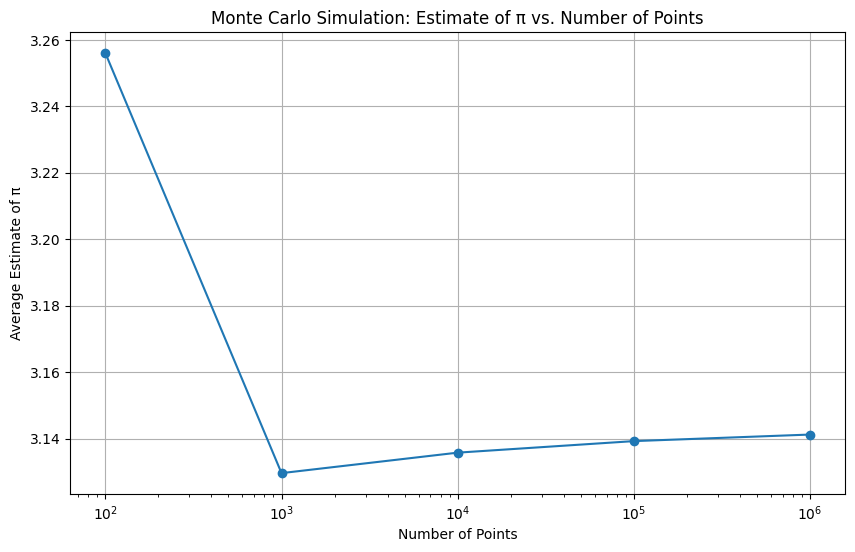

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(num_points_list, average_pi_estimates, marker="o")
plt.xscale("log")
plt.xlabel("Number of Points")
plt.ylabel("Average Estimate of π")
plt.title("Monte Carlo Simulation: Estimate of π vs. Number of Points")
plt.grid(True)
plt.show()

As you can see ,the higher the number of point, the more accurate the estimator to the actual value of PI,

## Mensch Game

In [7]:
class MenschGame:
    def __init__(self, num_players=4, board_size=40):
        self.num_players = num_players
        self.board_size = board_size
        self.positions = [0] * num_players
        self.winner = None

    def roll_dice(self):
        return random.randint(1, 6)

    def move_piece(self, player, steps):
        if self.positions[player] + steps > self.board_size:
            return
        self.positions[player] += steps
        if self.positions[player] == self.board_size:
            self.winner = player

    def play_game(self):
        while self.winner is None:
            for player in range(self.num_players):
                steps = self.roll_dice()
                self.move_piece(player, steps)
                if self.winner is not None:
                    break
        return self.winner

In [8]:
def simulate_games(num_simulations):
    wins = [0] * 4
    for _ in range(num_simulations):
        game = MenschGame()
        winner = game.play_game()
        wins[winner] += 1
    return [wins[i] / num_simulations for i in range(4)]

In [9]:
num_simulations = 1000000

win_probabilities = simulate_games(num_simulations)

for i, prob in enumerate(win_probabilities):
    print(f"Player {i+1}: Probability of winning = {prob:.4f}")

Player 1: Probability of winning = 0.2938
Player 2: Probability of winning = 0.2621
Player 3: Probability of winning = 0.2336
Player 4: Probability of winning = 0.2105


The probabilities show a relatively balanced competition among the players, with Player 1 having a slight advantage over Player 2, and Players 3 and 4 closely trailing behind. This indicates a relatively fair distribution of winning chances among the players in the simplified Mensch game.

## Central Limit Theorem (CLT)

In [10]:
from scipy.stats import chi2, expon, f

def chi_square_distribution(df):
  return chi2(df)

def exponential_distribution(rate):
  return expon(scale=1/rate)

def f_distribution(dfn, dfd):
  return f(dfn, dfd)

In [11]:
def sample_means(distribution, samples_count, samples_size):
  means_list = []
  for _ in range(samples_count):
    sample = distribution.rvs(size=samples_size)
    sample_mean = sample.mean()
    means_list.append(sample_mean)
  return means_list

In [12]:
def plot_sample_means_and_normal_distribution(sample_means , title):
  means = sample_means

  plt.hist(means, bins=30, density=True, alpha=0.5, color='blue', label='Sample Means')

  mu, std = norm.fit(means)

  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  plt.plot(x, p, 'k', color='red' , linewidth=2, label='Fitted Normal Dist.')

  plt.title(title)
  plt.xlabel('Sample Mean')
  plt.ylabel('Density')

  plt.legend()

  plt.show()


In [13]:
df = 5
rate = 3
dfn = 4 
dfd = 6
samples_count = 1000
original_sample_size = 30
mini_sample_size = 5

In [14]:
mini_chi_square_sample_means = sample_means(chi_square_distribution(df) , samples_count , mini_sample_size)
chi_square_sample_means = sample_means(chi_square_distribution(df) , samples_count , original_sample_size)
exponential_sample_means = sample_means(exponential_distribution(rate) , samples_count , original_sample_size)
mini_exponential_sample_means = sample_means(exponential_distribution(rate) , samples_count , mini_sample_size)
f_sample_means = sample_means(f_distribution(dfn,dfd) , samples_count , original_sample_size)
mini_f_sample_means = sample_means(f_distribution(dfn,dfd) , samples_count , mini_sample_size)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16852\3622913857.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color='red' , linewidth=2, label='Fitted Normal Dist.')


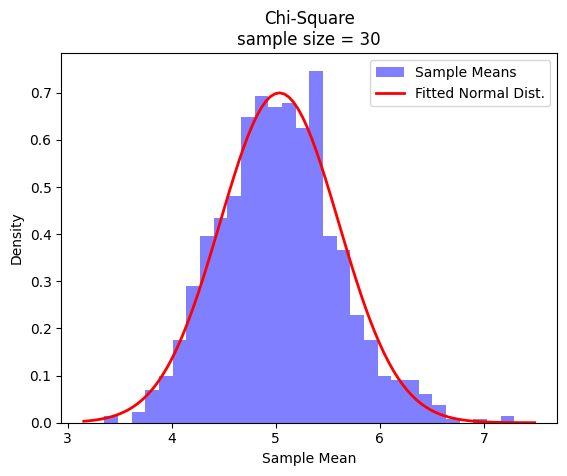

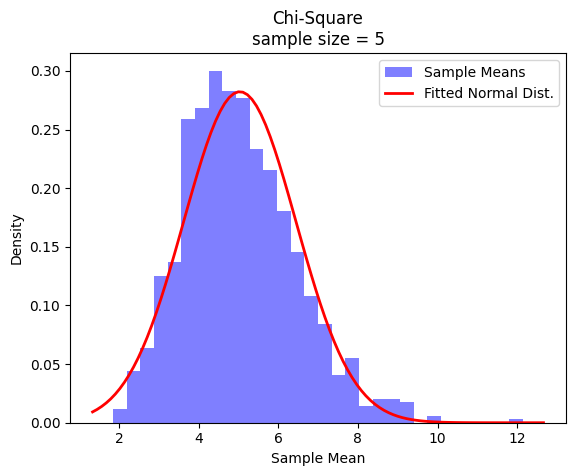

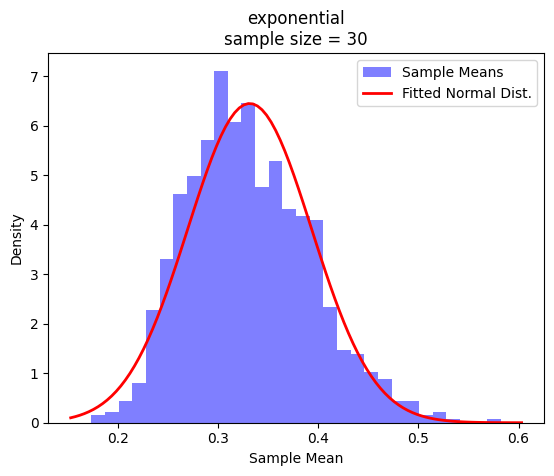

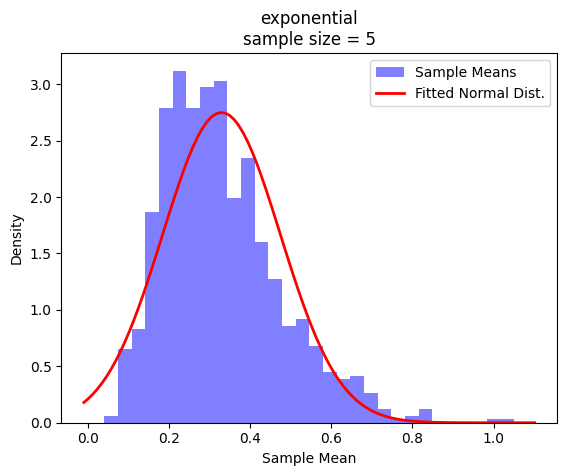

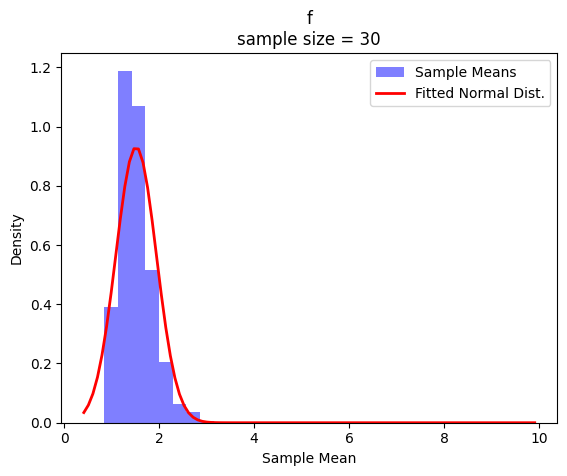

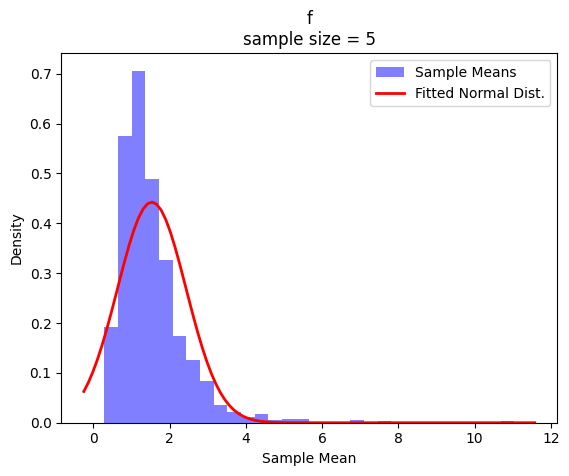

In [16]:
plot_sample_means_and_normal_distribution(chi_square_sample_means , f"Chi-Square\nsample size = {original_sample_size}")
plot_sample_means_and_normal_distribution(mini_chi_square_sample_means, f"Chi-Square\nsample size = {mini_sample_size}")
plot_sample_means_and_normal_distribution(exponential_sample_means, f"exponential\nsample size = {original_sample_size}")
plot_sample_means_and_normal_distribution(mini_exponential_sample_means, f"exponential\nsample size = {mini_sample_size}")
plot_sample_means_and_normal_distribution(f_sample_means, f"f\nsample size = {original_sample_size}")
plot_sample_means_and_normal_distribution(mini_f_sample_means, f"f\nsample size = {mini_sample_size}")

### Question 2. How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?
 As the sample size increases, the distribution of sample means becomes more narrowly concentrated around the true mean and approaches a normal distribution, as predicted by the Central Limit Theorem.

## unfair coin flip
The given Python code aims to simulate coin flips and perform a hypothesis test to determine whether the coin is fair or biased. It uses statistical methods to assess whether the observed results (number of heads) deviate significantly from what we would expect from a fair coin.

In [17]:
import numpy as np
from scipy.stats import norm

def simulate_coin(num_flips, bias):
    flips = np.random.binomial(num_flips, 0.5 + bias, 1)
    heads = flips[0]
    return heads

def coin_test(num_flips, bias, alpha=0.05):
    flips = simulate_coin(num_flips, bias)
    sample_prop = flips / num_flips
    
    mu = 0.5
    sigma = np.sqrt(0.5 * 0.5 / num_flips)
    z_score = (sample_prop - mu) / sigma
    p_value = 2 * norm.cdf(-abs(z_score))
    
    print(f"Number of flips: {num_flips}")
    print(f"Calculated z-score: {z_score:.4f}") 
    print(f"P-value: {p_value:.4f}")
    
    if p_value < alpha:
        print("Reject null hypothesis - coin is unfair")
    else:
        print("Fail to reject null hypothesis - not enough evidence coin is unfair")
        
    print()
        
print("Bias of 0.1 toward heads:")
coin_test(30, 0.1)
coin_test(100, 0.1)
coin_test(1000, 0.1)


Bias of 0.1 toward heads:
Number of flips: 30
Calculated z-score: 0.3651
P-value: 0.7150
Fail to reject null hypothesis - not enough evidence coin is unfair

Number of flips: 100
Calculated z-score: 3.0000
P-value: 0.0027
Reject null hypothesis - coin is unfair

Number of flips: 1000
Calculated z-score: 6.8938
P-value: 0.0000
Reject null hypothesis - coin is unfair



as we can see as we increaase the number of flips, the p-value gets smaller, to a point where its smaller than the significance level, meaning the coin flip is unfair.
### Question 3. How does increasing the sample size affect your coin test?
As the sample size increases, the estimates (such as the sample mean or proportion) become more precise. With a larger sample, smaller effect sizes become detectable. The standard error (a measure of the variability of the sample statistic) decreases with larger sample sizes.

## T-Test and Job Placement

The provided Python code performs a hypothesis test to determine whether job placement affects students’ GPA. It uses a manual t-test calculation and also demonstrates how to use the `scipy.stats.ttest_ind()` function for the same purpose.

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

data = pd.read_csv("job_placement.csv")

hired = data[data['placement_status'] == "Placed"]
not_hired = data[data['placement_status'] == "Not Placed"]

def t_test(group1, group2):
    n1 = len(group1)
    n2 = len(group2)

    m1 = np.mean(group1)
    m2 = np.mean(group2)

    s1 = np.std(group1)
    s2 = np.std(group2)

    sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))

    print(f"    Standard deviation\n          group 1: {s1}\n          group 2: {s2}")
    print(f"    Mean\n          group 1: {m1}\n          group 2: {m2}")
    print(f"    Sample size\n          group 1: {n1}\n          group 2: {n2}")
    print("     pool standard deviation: ", sp)

    t_stat = (m1 - m2) / (sp * np.sqrt(1/n1 + 1/n2))
    dof = n1 + n2 - 2

    print(f"        Degrees of Freedom: {dof}")
    print(f"        T-Statistic: {t_stat:.4f}")

    p_val = ttest_ind(group1, group2, equal_var=True).pvalue

    print(f"        P-Value: {p_val:.4f}")

    alpha = 0.05
    if p_val < alpha:
        print("     Reject null hypothesis - Job placement affects grades")
    else:
        print("     Fail to reject null hypothesis - Not enough evidence that job placement affects grades")

print("Manual T-Test:")
t_test(hired['gpa'], not_hired['gpa'])

print("\nUsing SciPy:")
ttest_ind(hired['gpa'], not_hired['gpa'], equal_var=True)

Manual T-Test:
    Standard deviation
          group 1: 0.1132523745383102
          group 2: 0.1411302642217109
    Mean
          group 1: 3.76140350877193
          group 2: 3.702307692307692
    Sample size
          group 1: 570
          group 2: 130
     pool standard deviation:  0.11889800252726962
        Degrees of Freedom: 698
        T-Statistic: 5.1138
        P-Value: 0.0000
     Reject null hypothesis - Job placement affects grades

Using SciPy:


TtestResult(statistic=5.105318956468754, pvalue=4.2636444940967887e-07, df=698.0)

#### Using Scipy Analyze:
Interpreting the output:

- A large absolute T-statistic (in this case, 5.105) indicates a large difference between the means of the two groups.
- A small P-value (in this case, approximately 4.26e-07) suggests strong evidence against the null hypothesis (that there is no difference between the means of the two groups). Since this P-value is much smaller than a typical significance level (e.g., 0.05), we would reject the null hypothesis.
- The degrees of freedom (698.0) are used in the calculation of the P-value and the critical values for the T-distribution.    

In summary, the output indicates that there is a significant difference between the GPAs of the hired and not-hired groups, with those who were hired having significantly higher GPAs, based on the small P-value.

### Question 4. What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?
1. T-Statistic:
The t-statistic (or t-value) is a measure that quantifies how much the sample mean differs from a hypothesized population mean.
2. Degrees of Freedom (df):
Degrees of freedom represent the number of independent pieces of information available in a sample.
3. T-Distribution:
The t-distribution is a probability distribution used for hypothesis testing when the sample size is small or when the population standard deviation is unknown.
It resembles a bell-shaped curve, similar to the normal distribution (z-distribution), but with heavier tails.
As the degrees of freedom increase, the t-distribution approaches the standard normal distribution (z-distribution).
We use the t-distribution to find critical values for specific confidence levels and calculate p-values in t-tests.
#### How They Help Compare Data Sets:
T-Statistic: It quantifies the difference between sample means, allowing us to assess whether the observed difference is statistically significant.
Degrees of Freedom: They determine the shape of the t-distribution and influence the critical t-values. Larger degrees of freedom lead to a distribution closer to the normal distribution.
T-Distribution: It provides critical values for hypothesis testing and helps us compare sample means, especially when sample sizes are small or population parameters are unknown.

### Question 5. What are the preliminary conditions for using t-test on our data?
1. Independence:
The observations in one sample should be independent of the observations in the other sample. Independence ensures that the data points are not influenced by each other.
2. Approximate Normality:
Both samples should be approximately normally distributed. Normality is crucial for accurate t-test results.
3. Homogeneity of Variances:
Both samples should have similar variances (homogeneity of variance). Unequal variances can affect the t-test results.
4. Sample Size:
The t-test works well with small to moderate sample sizes. For very small samples, consider using nonparametric tests.
5. Type of T-Test:
Decide whether you need a one-sample t-test, two-sample (independent) t-test, or paired samples t-test based on your research question and data structure.

### Question 6. Read about some other types of tests that are used in scientific research. Write a line about each of them.
1. ANOVA (Analysis of Variance):
Compares means across three or more groups. Useful for experimental designs with multiple treatments.
2. Regression Analysis:
Examines relationships between variables.
3. Chi-Square Test:
Assesses associations between categorical variables. Commonly used for contingency tables and goodness-of-fit tests.
4. Correlation Analysis:
Measures the strength and direction of association between two continuous variables.
5. Wilcoxon Signed-Rank Test:
Nonparametric alternative to paired t-test. Compares median differences between paired samples. Useful when data violate normality assumptions.
6. Mann-Whitney U Test (Wilcoxon Rank-Sum Test):
Nonparametric alternative to independent t-test. Compares medians between two independent groups. Suitable for ordinal or skewed data.
7. Kruskal-Wallis Test:
Nonparametric version of one-way ANOVA. Compares medians across three or more independent groups. Useful when data are not normally distributed.